In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


###### null values

In [3]:
data.isnull().sum().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.rename(columns={'default.payment.next.month': 'defaulted'}, inplace=True)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')

# Model Building

### train test split

In [6]:
data.drop('ID', axis=1, inplace=True)

In [7]:
X = data.drop('defaulted', axis=1, inplace=False)
y = data['defaulted']

In [8]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=101)

#### Model 1

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
predictions = rfc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     16306
           1       0.63      0.37      0.47      4694

    accuracy                           0.81     21000
   macro avg       0.74      0.65      0.68     21000
weighted avg       0.79      0.81      0.79     21000



In [12]:
confusion_matrix(y_test, predictions)

array([[15313,   993],
       [ 2968,  1726]], dtype=int64)

In [13]:
accuracy_score(y_test, predictions)

0.8113809523809524

#### Now performing hyperparameter tuning

###### max depth

In [14]:
from sklearn.model_selection import KFold, GridSearchCV

no_of_folds = 5
parameters = {"max_depth":range(1,10)}

rf = RandomForestClassifier()

rf = GridSearchCV(estimator=rf, param_grid=parameters, n_jobs=-1, cv=no_of_folds, scoring='accuracy',
                  return_train_score=True, verbose=True)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy', verbose=True)

In [15]:
scores = rf.cv_results_
sc_df = pd.DataFrame(scores)
sc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.626422,0.379626,0.067002,0.003229,1,{'max_depth': 1},0.788333,0.791667,0.797778,0.788889,...,0.790556,0.004022,9,0.791250,0.787917,0.802361,0.787778,0.786250,0.791111,0.005857
1,1.968578,0.052854,0.064800,0.003001,2,{'max_depth': 2},0.801667,0.811111,0.801111,0.810000,...,0.805667,0.004163,8,0.808194,0.806528,0.806250,0.804306,0.813194,0.807694,0.003014
2,3.071589,0.821328,0.103011,0.039033,3,{'max_depth': 3},0.807778,0.820000,0.812222,0.814444,...,0.812889,0.004193,7,0.814583,0.811667,0.817917,0.816944,0.817500,0.815722,0.002333
3,4.460002,0.932113,0.074594,0.002580,4,{'max_depth': 4},0.814444,0.825556,0.811667,0.815556,...,0.817000,0.004709,6,0.821528,0.821250,0.824583,0.822500,0.823194,0.822611,0.001206
4,4.104613,0.085904,0.084004,0.011785,5,{'max_depth': 5},0.818889,0.828333,0.813889,0.821667,...,0.820667,0.004667,5,0.827778,0.835278,0.831111,0.834861,0.828472,0.831500,0.003122
5,5.030090,0.129344,0.086398,0.006910,6,{'max_depth': 6},0.822778,0.830556,0.815556,0.822778,...,0.823333,0.004818,4,0.843333,0.841806,0.842361,0.843472,0.844722,0.843139,0.001004
6,5.647986,0.073362,0.092286,0.004637,7,{'max_depth': 7},0.828333,0.827778,0.821667,0.823333,...,0.825667,0.002662,2,0.855278,0.855000,0.851250,0.852639,0.853750,0.853583,0.001499
7,7.756565,0.760434,0.095208,0.008062,8,{'max_depth': 8},0.826667,0.829444,0.820000,0.823889,...,0.826222,0.003966,1,0.865417,0.866389,0.865833,0.862083,0.866944,0.865333,0.001705
8,7.223776,0.635593,0.087977,0.010929,9,{'max_depth': 9},0.827778,0.830556,0.815556,0.825000,...,0.825333,0.005195,3,0.875417,0.875556,0.874583,0.874444,0.875694,0.875139,0.000520


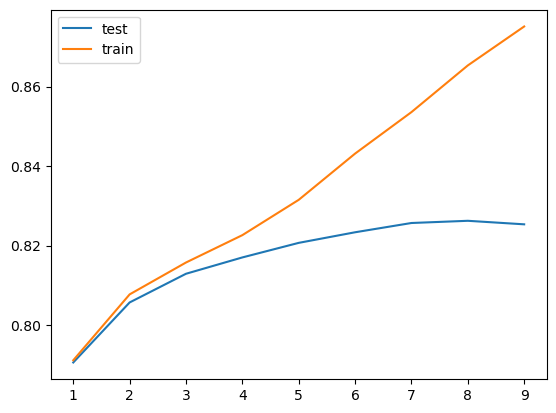

In [16]:
plt.figure()

plt.plot(sc_df['param_max_depth'], sc_df['mean_test_score'], label='test')
plt.plot(sc_df['param_max_depth'], sc_df['mean_train_score'], label='train')
plt.legend()
plt.show()

###### n_estimators

In [17]:
parameters = {"n_estimators":range(100, 1000, 100)}

rf = RandomForestClassifier(max_depth=5)

rf = GridSearchCV(estimator=rf, cv=no_of_folds, n_jobs=-1, scoring='accuracy', return_train_score=True,
                  verbose=True, param_grid=parameters)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 100)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [18]:
rf.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=500)

In [19]:
sc_df = pd.DataFrame(rf.cv_results_)
sc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.060191,0.208498,0.167005,0.057691,100,{'n_estimators': 100},0.821111,0.830556,0.812778,0.818333,...,0.821444,0.005948,3,0.832778,0.837917,0.833472,0.830556,0.833889,0.833722,0.002392
1,9.070685,0.389854,0.163417,0.024670,200,{'n_estimators': 200},0.816667,0.827222,0.813889,0.816667,...,0.818778,0.004573,9,0.826250,0.829583,0.830833,0.831528,0.830139,0.829667,0.001829
2,14.626522,1.363307,0.362286,0.116108,300,{'n_estimators': 300},0.818889,0.828889,0.815000,0.821667,...,0.822111,0.004962,2,0.828056,0.831111,0.833333,0.835139,0.837361,0.833000,0.003216
3,21.393562,2.828354,0.321205,0.012240,400,{'n_estimators': 400},0.820000,0.830000,0.816111,0.816667,...,0.821111,0.005055,4,0.827500,0.835556,0.831944,0.829444,0.833472,0.831583,0.002854
4,21.686690,0.392218,0.398802,0.042758,500,{'n_estimators': 500},0.821667,0.831667,0.815000,0.820000,...,0.822222,0.005421,1,0.828611,0.837500,0.831944,0.834861,0.833056,0.833194,0.002963
5,29.740392,8.142365,0.778993,0.420460,600,{'n_estimators': 600},0.818333,0.826667,0.816111,0.815000,...,0.820333,0.004851,6,0.827917,0.830278,0.832917,0.829722,0.835694,0.831306,0.002717
6,43.043258,7.614455,0.583015,0.039969,700,{'n_estimators': 700},0.821111,0.827222,0.814444,0.813889,...,0.820000,0.005152,8,0.829306,0.833194,0.834028,0.830417,0.833056,0.832000,0.001812
7,40.476219,0.378502,0.707799,0.121078,800,{'n_estimators': 800},0.818889,0.831667,0.814444,0.815000,...,0.820889,0.006465,5,0.828056,0.836250,0.833194,0.828472,0.832500,0.831694,0.003075
8,39.637321,1.727925,0.649549,0.028501,900,{'n_estimators': 900},0.820556,0.828333,0.814444,0.813889,...,0.820222,0.005529,7,0.829167,0.828194,0.832778,0.828333,0.833611,0.830417,0.002307


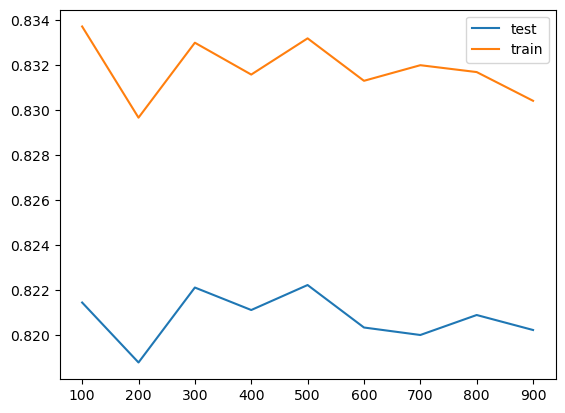

In [20]:
plt.figure()

plt.plot(sc_df['param_n_estimators'], sc_df['mean_test_score'], label='test')
plt.plot(sc_df['param_n_estimators'], sc_df['mean_train_score'], label='train')
plt.legend()
plt.show()

###### max_features

In [ ]:
parameters = {'max_features': [4,8,14,18,20,24]}

rf = RandomForestClassifier(max_depth=5, n_estimators=900)

rf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True, verbose=True)

rf.fit(X_train, y_train)

In [ ]:
sc_df = pd.DataFrame(rf.cv_results_)
sc_df

In [ ]:
plt.figure()

plt.plot(sc_df['param_max_features'], sc_df['mean_test_score'], label='test')
plt.plot(sc_df['param_max_features'], sc_df['mean_train_score'], label='train')
plt.legend()
plt.show()

### Hypertuning different parameters at once

In [ ]:
parameters = {
    'max_depth':[4,8,10],
    'min_samples_leaf':range(100, 200, 50),
    'min_samples_split':range(200, 300, 50),
    'n_estimators':[100, 1000, 2000],
    'max_features':[10, 20, 15]
}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, cv=5, scoring='accuracy', return_train_score=True, verbose=1, n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

###### from here we will get the best hyperparameters and then we can create our model with respective to those.